In [2]:
import torch
from torch_geometric.data import Data
from torch_geometric.datasets import Planetoid
import networkx as nx
import matplotlib.pyplot as plt

from src.visualizer.graphVisualizer import GraphVisualizer

## Load the cora dataset

In [3]:
dataset = Planetoid(root='./tmp/Cora', name='Cora')

Processing...
Done!


## Dataset statistics

In [39]:
print('Number of graphs: ', len(dataset))
print('\n')
print('Number of features: ', dataset.num_features)
print('\n')
print('Number of classes: ', dataset.num_classes)
print('\n')

data = dataset[0]

print(data)
print('\n')
print('Number of training nodes: ', data.train_mask.sum().item())

Number of graphs:  1


Number of features:  1433


Number of classes:  7


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


Number of training nodes:  140


## Cora dataset graph visualization

In [5]:
g = nx.Graph()

In [6]:
g.add_nodes_from(range(dataset[0].num_nodes))
g.add_edges_from(dataset[0].edge_index.t().tolist())

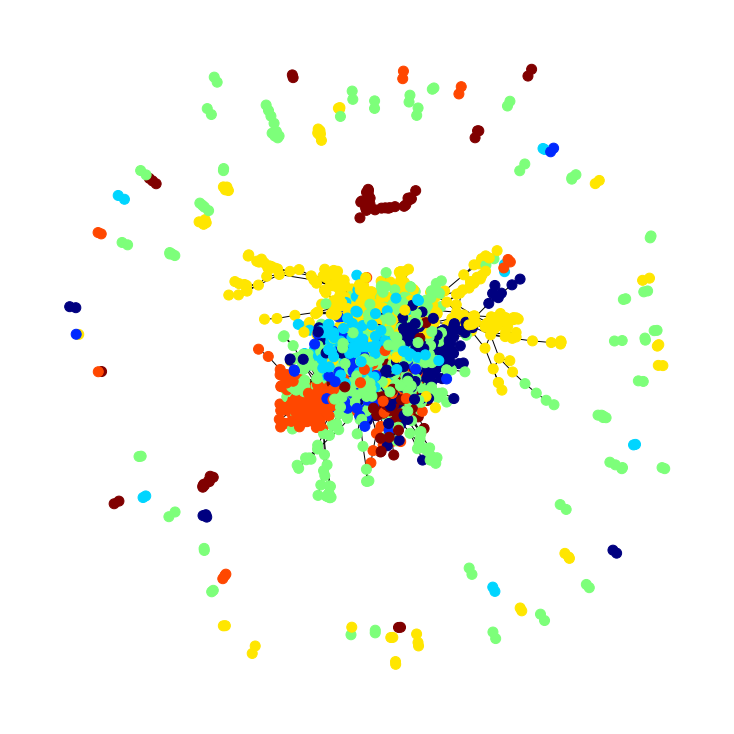

In [7]:
plt.figure(figsize=(10, 10))
nx.draw(g, node_size=100, node_color=dataset[0].y.tolist(), cmap='jet')

## Graph Neural Network

In [5]:
from src.models.gcn import GCN

### Graph Convolutional Network

##### Configuring the model

In [25]:
model = GCN(
    
    nfeatures=dataset.num_features,
    nclasses=dataset.num_classes,
    hidden_channels=16
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

In [15]:
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


##### Visualizing the model graph before training

In [45]:
visualizer = GraphVisualizer()

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


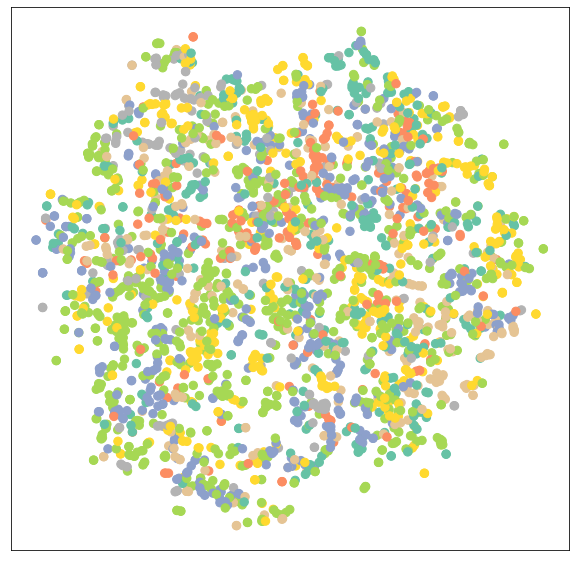

In [9]:
model.eval()

out = model(dataset.x, dataset.edge_index)
visualizer.draw(out, color=dataset.y)

### Train and Evaluate the GCN Model

##### Define the train and test functions

In [26]:
def train():
    
      model.train()
      optimizer.zero_grad()
      
      out = model(dataset.x, dataset.edge_index)
      loss = criterion(out[dataset.train_mask], dataset.y[dataset.train_mask])
      
      loss.backward()
      optimizer.step()
      
      return loss

def test():
    
      model.eval()
      
      out = model(dataset.x, dataset.edge_index)
      pred = out.argmax(dim=1)
      
      test_correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]
      test_acc = int(test_correct.sum()) / int(dataset.test_mask.sum())
      
      return test_acc

##### Define the number of epochs and run the training loop

In [27]:
NUMBER_OF_EPOCHS = 101

In [28]:
for epoch in range(1, NUMBER_OF_EPOCHS):
    
    loss = train()
    test_acc = test()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test: {test_acc:.4f}')

Epoch: 001, Loss: 1.9465, Test: 0.4610
Epoch: 002, Loss: 1.8446, Test: 0.5860
Epoch: 003, Loss: 1.7009, Test: 0.6310
Epoch: 004, Loss: 1.5574, Test: 0.6470
Epoch: 005, Loss: 1.4296, Test: 0.6800
Epoch: 006, Loss: 1.2859, Test: 0.7020
Epoch: 007, Loss: 1.1555, Test: 0.7180
Epoch: 008, Loss: 1.0210, Test: 0.7340
Epoch: 009, Loss: 0.9085, Test: 0.7490
Epoch: 010, Loss: 0.7823, Test: 0.7570
Epoch: 011, Loss: 0.7250, Test: 0.7630
Epoch: 012, Loss: 0.6313, Test: 0.7700
Epoch: 013, Loss: 0.5988, Test: 0.7720
Epoch: 014, Loss: 0.5185, Test: 0.7760
Epoch: 015, Loss: 0.4819, Test: 0.7780
Epoch: 016, Loss: 0.3987, Test: 0.7830
Epoch: 017, Loss: 0.3600, Test: 0.7870
Epoch: 018, Loss: 0.3760, Test: 0.7860
Epoch: 019, Loss: 0.2832, Test: 0.7890
Epoch: 020, Loss: 0.2439, Test: 0.7900
Epoch: 021, Loss: 0.2529, Test: 0.7910
Epoch: 022, Loss: 0.1996, Test: 0.7930
Epoch: 023, Loss: 0.1819, Test: 0.7920
Epoch: 024, Loss: 0.1634, Test: 0.7940
Epoch: 025, Loss: 0.1309, Test: 0.7960
Epoch: 026, Loss: 0.1293,

##### After training and evaluation, we have the test accuracy of around 0.81

In [30]:
print("Test accuracy: {:.4f}".format(test_acc))

Test accuracy: 0.8060


##### Visualizing the model graph after training

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


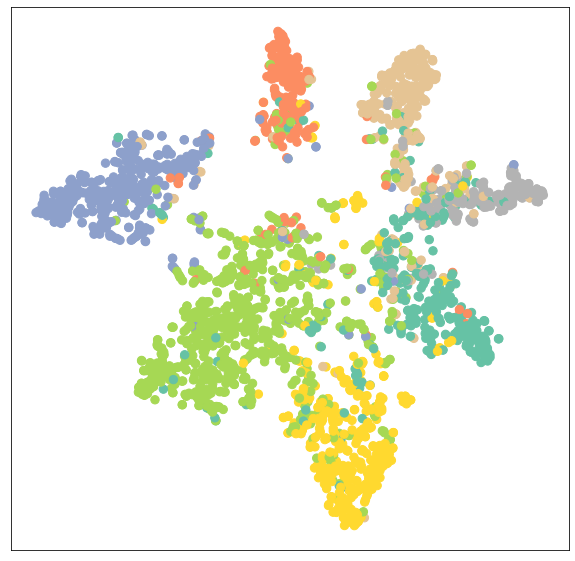

In [13]:
model.eval()

out = model(dataset.x, dataset.edge_index)
visualizer.draw(out, color=dataset.y)